In [265]:
import pandas as pd
import numpy as np

In [266]:
NBA_Analysis_CSV = pd.read_csv("Player Game Data.csv")
NBA_Analysis_CSVONE = pd.read_csv("Player Game Data.csv")

In [267]:
print(NBA_Analysis_CSV.shape)

(22393, 64)


In [268]:
pd.set_option("display.max_columns",None)
print(NBA_Analysis_CSV.head())

  SEASON_YEAR  PLAYER_ID        PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0     2019-20       2617      Udonis Haslem  1610612748               MIA   
1     2019-20    1627763    Malcolm Brogdon  1610612754               IND   
2     2019-20     202335  Patrick Patterson  1610612746               LAC   
3     2019-20    1628408          PJ Dozier  1610612743               DEN   
4     2019-20    1629126      Deonte Burton  1610612760               OKC   

               TEAM_NAME   GAME_ID            GAME_DATE      MATCHUP WL  \
0             Miami Heat  21901316  2020-08-14T00:00:00    MIA @ IND  L   
1         Indiana Pacers  21901316  2020-08-14T00:00:00  IND vs. MIA  W   
2            LA Clippers  21901317  2020-08-14T00:00:00  LAC vs. OKC  W   
3         Denver Nuggets  21901318  2020-08-14T00:00:00    DEN @ TOR  L   
4  Oklahoma City Thunder  21901317  2020-08-14T00:00:00    OKC @ LAC  L   

         MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  \
0  23.5

In [269]:
print(NBA_Analysis_CSV.dtypes)

SEASON_YEAR              object
PLAYER_ID                 int64
PLAYER_NAME              object
TEAM_ID                   int64
TEAM_ABBREVIATION        object
TEAM_NAME                object
GAME_ID                   int64
GAME_DATE                object
MATCHUP                  object
WL                       object
MIN                     float64
FGM                       int64
FGA                       int64
FG_PCT                  float64
FG3M                      int64
FG3A                      int64
FG3_PCT                 float64
FTM                       int64
FTA                       int64
FT_PCT                  float64
OREB                      int64
DREB                      int64
REB                       int64
AST                       int64
TOV                       int64
STL                       int64
BLK                       int64
BLKA                      int64
PF                        int64
PFD                       int64
PTS                       int64
PLUS_MIN

In [270]:
print(NBA_Analysis_CSV.describe())

          PLAYER_ID       TEAM_ID       GAME_ID           MIN           FGM  \
count  2.239300e+04  2.239300e+04  2.239300e+04  22393.000000  22393.000000   
mean   9.755902e+05  1.610613e+09  2.190055e+07     22.867414      3.865047   
std    7.160578e+05  8.595044e+00  3.468532e+02     10.222347      3.151981   
min    1.713000e+03  1.610613e+09  2.190000e+07      0.000000      0.000000   
25%    2.030860e+05  1.610613e+09  2.190026e+07     15.683333      1.000000   
50%    1.626179e+06  1.610613e+09  2.190053e+07     23.766667      3.000000   
75%    1.628964e+06  1.610613e+09  2.190079e+07     31.050000      6.000000   
max    1.629760e+06  1.610613e+09  2.190132e+07     51.550000     20.000000   

                FGA        FG_PCT          FG3M          FG3A       FG3_PCT  \
count  22393.000000  22393.000000  22393.000000  22393.000000  22393.000000   
mean       8.400661      0.429778      1.154914      3.226544      0.257435   
std        5.840515      0.245356      1.463160    

In [271]:
NBA_Analysis_CSV_Copy=NBA_Analysis_CSV.copy()

In [272]:
NBA_Analysis_CSV["PTS_RBS_ASTS"]=NBA_Analysis_CSV["PTS"]+NBA_Analysis_CSV["REB"]+NBA_Analysis_CSV["AST"]

In [273]:
NBA_Analysis_CSV.to_csv("New CSV")

In [274]:
NBA_Analysis_CSV_TOP_Scorer=NBA_Analysis_CSV.copy()

In [275]:
NBA_Analysis_CSV_TOP_Scorer["AVG_PTS"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["PTS"].transform("mean")

In [276]:
print(NBA_Analysis_CSV_TOP_Scorer.head())

  SEASON_YEAR  PLAYER_ID        PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0     2019-20       2617      Udonis Haslem  1610612748               MIA   
1     2019-20    1627763    Malcolm Brogdon  1610612754               IND   
2     2019-20     202335  Patrick Patterson  1610612746               LAC   
3     2019-20    1628408          PJ Dozier  1610612743               DEN   
4     2019-20    1629126      Deonte Burton  1610612760               OKC   

               TEAM_NAME   GAME_ID            GAME_DATE      MATCHUP WL  \
0             Miami Heat  21901316  2020-08-14T00:00:00    MIA @ IND  L   
1         Indiana Pacers  21901316  2020-08-14T00:00:00  IND vs. MIA  W   
2            LA Clippers  21901317  2020-08-14T00:00:00  LAC vs. OKC  W   
3         Denver Nuggets  21901318  2020-08-14T00:00:00    DEN @ TOR  L   
4  Oklahoma City Thunder  21901317  2020-08-14T00:00:00    OKC @ LAC  L   

         MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  \
0  23.5

In [277]:
NBA_Analysis_CSV_TOP_Scorer=NBA_Analysis_CSV_TOP_Scorer.drop_duplicates(subset="PLAYER_ID")

In [278]:
NBA_Analysis_CSV_TOP_Scorer["Top_PTS_Per_Game"]=NBA_Analysis_CSV_TOP_Scorer.groupby("TEAM_ID")["AVG_PTS"].rank(ascending=False)

In [279]:
pd.set_option("display.max_rows",None)

NBA_Analysis_CSV_TOP_Scorer= NBA_Analysis_CSV_TOP_Scorer[NBA_Analysis_CSV_TOP_Scorer["Top_PTS_Per_Game"]==1]

In [280]:
NBA_Analysis_CSV_TOP_Scorer

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,AVG_PTS,Top_PTS_Per_Game
14,2019-20,201935,James Harden,1610612745,HOU,Houston Rockets,21901315,2020-08-14T00:00:00,HOU vs. PHI,L,26.283333,9,16,0.563,4,9,0.444,5,5,1.000,0,3,3,10,7,1,2,0,1,6,27,-11,47.6,1,0,1,11184,11184,11184,9229,1367,2287,5889,800,860,5961,1616,2711,1,11304,8691,11273,286,54,3910,720,1,4186,894,1028,18852,1169,1,101,40,34.338235,1.0
32,2019-20,203999,Nikola Jokic,1610612743,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,10.200000,1,1,1.000,0,0,0.000,0,0,0.000,0,1,1,2,1,0,0,0,0,1,2,-6,5.2,0,0,1,11184,11184,11184,19456,16399,20287,1,12218,17645,12218,12027,12814,12027,11304,15663,17262,7732,7875,10567,7039,1,1,10668,18314,15626,19550,1909,101,5,19.945205,1.0
43,2019-20,1628983,Shai Gilgeous-Alexander,1610612760,OKC,Oklahoma City Thunder,21901317,2020-08-14T00:00:00,OKC @ LAC,L,13.516667,6,10,0.600,0,1,0.000,1,1,1.000,0,4,4,0,3,1,0,0,0,4,13,12,17.8,0,0,1,11184,11184,11184,18033,4285,7049,4415,12218,14524,12218,9105,11453,1,11304,5976,8556,16549,1782,3910,7039,1,1,2590,6972,2830,12193,1909,101,17,19.014286,1.0
68,2019-20,203954,Joel Embiid,1610612755,PHI,Philadelphia 76ers,21901315,2020-08-14T00:00:00,PHI @ HOU,W,22.851667,6,12,0.500,0,0,0.000,2,3,0.667,2,4,6,1,5,1,1,4,5,2,14,9,23.7,0,0,1,1,1,1,11847,4285,5001,7108,12218,17645,12218,5552,5559,8310,2526,5976,4656,11429,331,3910,2206,22252,20977,6771,6239,4119,8754,1909,101,21,22.980392,1.0
99,2019-20,202696,Nikola Vucevic,1610612753,ORL,Orlando Magic,21901312,2020-08-13T00:00:00,ORL vs. NOP,W,25.916667,10,11,0.909,3,4,0.750,0,0,0.000,0,6,6,3,0,1,0,0,0,1,23,18,37.7,0,0,1,1,1,1,9501,835,5930,995,1756,6437,1302,12027,12814,12027,11304,2739,4656,5244,14568,3910,7039,1,1,10668,1953,1243,3012,1909,101,32,19.596774,1.0
138,2019-20,1629029,Luka Doncic,1610612742,DAL,Dallas Mavericks,21901313,2020-08-13T00:00:00,DAL @ PHX,L,13.233333,5,9,0.556,1,2,0.500,7,7,1.000,1,4,5,0,1,1,0,0,2,5,18,-2,26.0,0,0,1,11184,11184,11184,18165,5844,8240,5983,6857,11477,3230,742,1305,1,5289,5976,6392,16549,7875,3910,7039,1,9590,1560,3879,12258,7484,1909,101,23,28.836066,1.0
150,2019-20,203081,Damian Lillard,1610612757,POR,Portland Trail Blazers,21901309,2020-08-13T00:00:00,POR @ BKN,W,43.866667,13,22,0.591,8,14,0.571,8,9,0.889,0,3,3,12,1,2,0,0,1,6,42,-1,68.6,1,0,1,1,1,1,66,174,490,5129,25,61,2918,508,650,5923,11304,8691,11273,99,7875,1252,7039,1,4186,894,62,11353,78,1,101,57,29.969697,1.0
159,2019-20,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,21901313,2020-08-13T00:00:00,PHX vs. DAL,W,31.543333,11,20,0.550,0,5,0.000,5,5,1.000,0,7,7,5,0,0,0,1,3,5,27,30,42.9,0,0,1,1,1,1,5233,532,852,6358,12218,4572,12218,1616,2711,1,11304,1841,3402,2442,14568,10567,7039,14867,14861,1560,1028,142,1892,1909,101,39,26.614286,1.0
164,2019-20,1629630,Ja Morant,1610612763,MEM,Memphis Grizzlies,21901311,2020-08-13T00:00:00,MEM vs. MIL,W,34.083333,5,17,0.294,0,4,0.000,2,2,1.000,4,9,13,10,6,0,0,0,3,3,12,15,36.6,1,1,1,1,1,1,3359,5844,1784,16669,12218,6437,12218,5552,6839,1,567,784,480,286,141,10567,7039,1,14861,4183,7720,1900,3300,1,1,35,17.805970,1.0
204,2019-20,1628378,Donovan Mitchell,1610612762,UTA,Utah Jazz,21901314,2020-08-13T00:00:00,UTA vs. SAS,W,11.333333,3,5,0.600,3,4,0.750,2,2,1.000,0,4,4,3,0,0,0,0,1,1,11,1,20.3,0,0,1,1,1,1,19074,10497,14259,4415,1756,6437,1302,5552,6839,1,11304,5976,8556,5244,14568,10567,7039,1,4186,10668,8592,9535,10689,1909,101,18,23.985507,1.0


In [281]:
NBA_Analysis_CSV_TOP_Scorer=NBA_Analysis_CSV_TOP_Scorer.sort_values(by=["AVG_PTS"],ascending=False)


In [282]:
NBA_Analysis_CSV_TOP_Scorer

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,AVG_PTS,Top_PTS_Per_Game
14,2019-20,201935,James Harden,1610612745,HOU,Houston Rockets,21901315,2020-08-14T00:00:00,HOU vs. PHI,L,26.283333,9,16,0.563,4,9,0.444,5,5,1.000,0,3,3,10,7,1,2,0,1,6,27,-11,47.6,1,0,1,11184,11184,11184,9229,1367,2287,5889,800,860,5961,1616,2711,1,11304,8691,11273,286,54,3910,720,1,4186,894,1028,18852,1169,1,101,40,34.338235,1.0
2020,2019-20,203078,Bradley Beal,1610612764,WAS,Washington Wizards,21900961,2020-03-10T00:00:00,WAS vs. NYK,W,38.503333,11,25,0.440,4,10,0.400,13,15,0.867,0,3,3,7,5,3,1,0,2,8,39,14,60.1,0,0,1,1,1,1,768,532,184,11245,800,536,6455,67,63,6092,11304,8691,11273,1152,331,348,2206,1,9590,314,117,2172,264,1909,101,49,30.543860,1.0
150,2019-20,203081,Damian Lillard,1610612757,POR,Portland Trail Blazers,21901309,2020-08-13T00:00:00,POR @ BKN,W,43.866667,13,22,0.591,8,14,0.571,8,9,0.889,0,3,3,12,1,2,0,0,1,6,42,-1,68.6,1,0,1,1,1,1,66,174,490,5129,25,61,2918,508,650,5923,11304,8691,11273,99,7875,1252,7039,1,4186,894,62,11353,78,1,101,57,29.969697,1.0
1956,2019-20,1629027,Trae Young,1610612737,ATL,Atlanta Hawks,21900969,2020-03-11T00:00:00,ATL vs. NYK,L,37.751667,12,25,0.480,6,12,0.500,12,15,0.800,2,0,2,11,6,0,0,1,3,9,42,-4,54.9,1,0,1,11184,11184,11184,1077,316,184,9960,136,179,3230,97,63,6704,2526,19440,14253,163,141,10567,7039,14867,14861,173,62,14035,514,1,101,55,29.633333,1.0
432,2019-20,203507,Giannis Antetokounmpo,1610612749,MIL,Milwaukee Bucks,21901303,2020-08-11T00:00:00,MIL @ WAS,W,10.150000,1,3,0.333,0,0,0.000,10,12,0.833,2,7,9,1,3,1,0,0,2,8,12,12,24.3,0,0,1,1,1,1,19474,16399,17424,14612,12218,17645,12218,195,222,6261,2526,1841,1902,11429,1782,3910,7039,1,9590,314,7720,2830,8415,1909,101,22,29.476190,1.0
138,2019-20,1629029,Luka Doncic,1610612742,DAL,Dallas Mavericks,21901313,2020-08-13T00:00:00,DAL @ PHX,L,13.233333,5,9,0.556,1,2,0.500,7,7,1.000,1,4,5,0,1,1,0,0,2,5,18,-2,26.0,0,0,1,11184,11184,11184,18165,5844,8240,5983,6857,11477,3230,742,1305,1,5289,5976,6392,16549,7875,3910,7039,1,9590,1560,3879,12258,7484,1909,101,23,28.836066,1.0
6985,2019-20,202681,Kyrie Irving,1610612751,BKN,Brooklyn Nets,21900731,2020-02-01T00:00:00,BKN @ WAS,L,28.643333,5,12,0.417,1,5,0.200,0,0,0.000,2,2,4,4,6,1,1,1,4,4,11,-5,21.8,0,0,1,11184,11184,11184,7465,5844,5001,12074,6857,4572,11014,12027,12814,12027,2526,11973,8556,3556,141,3910,2206,14867,18631,2590,8592,14884,9774,1909,101,19,27.400000,1.0
290,2019-20,202695,Kawhi Leonard,1610612746,LAC,LA Clippers,21901307,2020-08-12T00:00:00,LAC @ DEN,W,33.371667,9,16,0.563,1,4,0.250,7,8,0.875,0,5,5,3,1,2,0,0,4,7,26,12,41.5,0,0,1,1,1,1,3890,1367,2287,5889,6857,6437,9796,742,894,5983,11304,4038,6392,5244,7875,1252,7039,1,18631,541,1214,2830,2140,1909,101,34,27.070175,1.0
159,2019-20,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,21901313,2020-08-13T00:00:00,PHX vs. DAL,W,31.543333,11,20,0.550,0,5,0.000,5,5,1.000,0,7,7,5,0,0,0,1,3,5,27,30,42.9,0,0,1,1,1,1,5233,532,852,6358,12218,4572,12218,1616,2711,1,11304,1841,3402,2442,14568,10567,7039,14867,14861,1560,1028,142,1892,1909,101,39,26.614286,1.0
5614,2019-20,1626157,Karl-Anthony Towns,1610612750,MIN,Minnesota Timberwolves,21900796,2020-02-10T00:00:00,MIN @ TOR,L,36.758333,5,13,0.385,3,6,0.500,10,12,0.833,4,6,10,7,5,1,1,1,4,8,23,-7,46.5,1,0,1,11184,11184,11184,1581,5844,4211,13415,1756,3146,3230,195,222,6261,567,2739,1370,1152,331,3910,2206,14867,18631,314,1953,16391,1316,1,101,40,26.457143,1.0


In [283]:
teams_games_played=pd.read_csv("Team Games Played.csv")

In [284]:
NBA_Analysis_CSV_TOP_Scorer=pd.merge(teams_games_played,NBA_Analysis_CSV_TOP_Scorer,how="left",on="TEAM_ID")

In [285]:
NBA_Analysis_CSV_TOP_Scorer["Games Played"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["PLAYER_ID"].transform("count")
NBA_Analysis_CSV_TOP_Scorer

,TEAM_ID,team_game_count,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,AVG_PTS,Top_PTS_Per_Game,Games Played
0,1610612737,67,2019-20,1629027,Trae Young,ATL,Atlanta Hawks,21900969,2020-03-11T00:00:00,ATL vs. NYK,L,37.751667,12,25,0.480,6,12,0.500,12,15,0.800,2,0,2,11,6,0,0,1,3,9,42,-4,54.9,1,0,1,11184,11184,11184,1077,316,184,9960,136,179,3230,97,63,6704,2526,19440,14253,163,141,10567,7039,14867,14861,173,62,14035,514,1,101,55,29.633333,1.0,4
1,1610612738,72,2019-20,1628369,Jayson Tatum,BOS,Boston Celtics,21901301,2020-08-11T00:00:00,BOS @ MEM,W,28.773333,10,13,0.769,4,5,0.800,5,5,1.000,1,5,6,2,5,1,0,0,1,2,29,10,37.2,0,0,1,1,1,1,7355,835,4211,1658,800,4572,1201,1616,2711,1,5289,4038,4656,7732,331,3910,7039,1,4186,6771,776,3657,3147,1909,101,37,23.439394,1.0,54
2,1610612751,72,2019-20,202681,Kyrie Irving,BKN,Brooklyn Nets,21900731,2020-02-01T00:00:00,BKN @ WAS,L,28.643333,5,12,0.417,1,5,0.200,0,0,0.000,2,2,4,4,6,1,1,1,4,4,11,-5,21.8,0,0,1,11184,11184,11184,7465,5844,5001,12074,6857,4572,11014,12027,12814,12027,2526,11973,8556,3556,141,3910,2206,14867,18631,2590,8592,14884,9774,1909,101,19,27.400000,1.0,59
3,1610612766,65,2019-20,1628984,Devonte' Graham,CHA,Charlotte Hornets,21900970,2020-03-11T00:00:00,CHA @ MIA,W,36.940000,11,19,0.579,8,11,0.727,0,0,0.000,0,1,1,6,5,1,0,0,0,2,30,3,38.2,0,0,1,1,1,1,1486,532,1103,5360,25,317,1573,12027,12814,12027,11304,15663,17262,1685,331,3910,7039,1,1,6771,621,7893,2867,1909,101,37,18.174603,1.0,29
4,1610612741,65,2019-20,203897,Zach LaVine,CHI,Chicago Bulls,21900887,2020-02-29T00:00:00,CHI @ NYK,L,37.600000,10,25,0.400,4,8,0.500,2,5,0.400,0,3,3,7,1,1,0,2,5,4,26,-11,42.1,0,0,1,11184,11184,11184,1141,835,184,12431,800,1387,3230,5552,2711,11590,11304,8691,11273,1152,7875,3910,7039,20277,20977,2590,1214,18852,2029,1909,101,36,25.500000,1.0,39
5,1610612739,65,2019-20,1629012,Collin Sexton,CLE,Cleveland Cavaliers,21900962,2020-03-10T00:00:00,CLE @ CHI,L,36.450000,12,16,0.750,0,0,0.000,2,2,1.000,0,3,3,5,5,1,0,0,1,3,26,3,35.1,0,0,1,11184,11184,11184,1759,316,2287,1693,12218,17645,12218,5552,6839,1,11304,8691,11273,2442,331,3910,7039,1,4186,4183,1214,7893,3803,1909,101,34,20.753846,1.0,25
6,1610612742,75,2019-20,1629029,Luka Doncic,DAL,Dallas Mavericks,21901313,2020-08-13T00:00:00,DAL @ PHX,L,13.233333,5,9,0.556,1,2,0.500,7,7,1.000,1,4,5,0,1,1,0,0,2,5,18,-2,26.0,0,0,1,11184,11184,11184,18165,5844,8240,5983,6857,11477,3230,742,1305,1,5289,5976,6392,16549,7875,3910,7039,1,9590,1560,3879,12258,7484,1909,101,23,28.836066,1.0,41
7,1610612743,73,2019-20,203999,Nikola Jokic,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,10.200000,1,1,1.000,0,0,0.000,0,0,0.000,0,1,1,2,1,0,0,0,0,1,2,-6,5.2,0,0,1,11184,11184,11184,19456,16399,20287,1,12218,17645,12218,12027,12814,12027,11304,15663,17262,7732,7875,10567,7039,1,1,10668,18314,15626,19550,1909,101,5,19.945205,1.0,18
8,1610612765,66,2019-20,201565,Derrick Rose,DET,Detroit Pistons,21900899,2020-03-01T00:00:00,DET @ SAC,L,9.383333,3,5,0.600,1,1,1.000,2,2,1.000,0,3,3,2,1,0,0,0,1,1,9,11,14.6,0,0,1,11184,11184,11184,19694,10497,14259,4415,6857,14524,1,5552,6839,1,11304,8691,11273,7732,7875,10567,7039,1,4186,10668,10523,3220,14133,1909,101,14,18.080000,1.0,47
9,1610612744,65,2019-20,203952,Andrew Wiggins,GSW,Golden State Warriors,21900967,2020-03-10T00:00:00,GSW vs. LAC,L,32.350000,8,16,0.500,3,8,0.375,2,4,0.500,0,2,2,3,1,0,0,1,1,3,21,-18,26.9,0,0,1,11184,11184,11184,4601,2067,2287,7108,1756,1387,7212,5552,3502,9400,11304,11973,14253,5244,7875,10567,7039,14867,4186,4183,2620,21170,7019,1

In [286]:
NBA_Analysis_CSV_TOP_Scorer.head()

,TEAM_ID,team_game_count,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,AVG_PTS,Top_PTS_Per_Game,Games Played
0,1610612737,67,2019-20,1629027,Trae Young,ATL,Atlanta Hawks,21900969,2020-03-11T00:00:00,ATL vs. NYK,L,37.751667,12,25,0.480,6,12,0.500,12,15,0.8,2,0,2,11,6,0,0,1,3,9,42,-4,54.9,1,0,1,11184,11184,11184,1077,316,184,9960,136,179,3230,97,63,6704,2526,19440,14253,163,141,10567,7039,14867,14861,173,62,14035,514,1,101,55,29.633333,1.0,4
1,1610612738,72,2019-20,1628369,Jayson Tatum,BOS,Boston Celtics,21901301,2020-08-11T00:00:00,BOS @ MEM,W,28.773333,10,13,0.769,4,5,0.800,5,5,1.0,1,5,6,2,5,1,0,0,1,2,29,10,37.2,0,0,1,1,1,1,7355,835,4211,1658,800,4572,1201,1616,2711,1,5289,4038,4656,7732,331,3910,7039,1,4186,6771,776,3657,3147,1909,101,37,23.439394,1.0,54
2,1610612751,72,2019-20,202681,Kyrie Irving,BKN,Brooklyn Nets,21900731,2020-02-01T00:00:00,BKN @ WAS,L,28.643333,5,12,0.417,1,5,0.200,0,0,0.0,2,2,4,4,6,1,1,1,4,4,11,-5,21.8,0,0,1,11184,11184,11184,7465,5844,5001,12074,6857,4572,11014,12027,12814,12027,2526,11973,8556,3556,141,3910,2206,14867,18631,2590,8592,14884,9774,1909,101,19,27.400000,1.0,59
3,1610612766,65,2019-20,1628984,Devonte' Graham,CHA,Charlotte Hornets,21900970,2020-03-11T00:00:00,CHA @ MIA,W,36.940000,11,19,0.579,8,11,0.727,0,0,0.0,0,1,1,6,5,1,0,0,0,2,30,3,38.2,0,0,1,1,1,1,1486,532,1103,5360,25,317,1573,12027,12814,12027,11304,15663,17262,1685,331,3910,7039,1,1,6771,621,7893,2867,1909,101,37,18.174603,1.0,29
4,1610612741,65,2019-20,203897,Zach LaVine,CHI,Chicago Bulls,21900887,2020-02-29T00:00:00,CHI @ NYK,L,37.600000,10,25,0.400,4,8,0.500,2,5,0.4,0,3,3,7,1,1,0,2,5,4,26,-11,42.1,0,0,1,11184,11184,11184,1141,835,184,12431,800,1387,3230,5552,2711,11590,11304,8691,11273,1152,7875,3910,7039,20277,20977,2590,1214,18852,2029,1909,101,36,25.500000,1.0,39


In [287]:
NBA_Analysis_CSV_TOP_Scorer["Games_Played_Percentage"]=NBA_Analysis_CSV_TOP_Scorer["Games Played"]/NBA_Analysis_CSV_TOP_Scorer["team_game_count"]

In [288]:
NBA_Analysis_CSV_TOP_Scorer

,TEAM_ID,team_game_count,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,AVG_PTS,Top_PTS_Per_Game,Games Played,Games_Played_Percentage
0,1610612737,67,2019-20,1629027,Trae Young,ATL,Atlanta Hawks,21900969,2020-03-11T00:00:00,ATL vs. NYK,L,37.751667,12,25,0.480,6,12,0.500,12,15,0.800,2,0,2,11,6,0,0,1,3,9,42,-4,54.9,1,0,1,11184,11184,11184,1077,316,184,9960,136,179,3230,97,63,6704,2526,19440,14253,163,141,10567,7039,14867,14861,173,62,14035,514,1,101,55,29.633333,1.0,4,0.059701
1,1610612738,72,2019-20,1628369,Jayson Tatum,BOS,Boston Celtics,21901301,2020-08-11T00:00:00,BOS @ MEM,W,28.773333,10,13,0.769,4,5,0.800,5,5,1.000,1,5,6,2,5,1,0,0,1,2,29,10,37.2,0,0,1,1,1,1,7355,835,4211,1658,800,4572,1201,1616,2711,1,5289,4038,4656,7732,331,3910,7039,1,4186,6771,776,3657,3147,1909,101,37,23.439394,1.0,54,0.750000
2,1610612751,72,2019-20,202681,Kyrie Irving,BKN,Brooklyn Nets,21900731,2020-02-01T00:00:00,BKN @ WAS,L,28.643333,5,12,0.417,1,5,0.200,0,0,0.000,2,2,4,4,6,1,1,1,4,4,11,-5,21.8,0,0,1,11184,11184,11184,7465,5844,5001,12074,6857,4572,11014,12027,12814,12027,2526,11973,8556,3556,141,3910,2206,14867,18631,2590,8592,14884,9774,1909,101,19,27.400000,1.0,59,0.819444
3,1610612766,65,2019-20,1628984,Devonte' Graham,CHA,Charlotte Hornets,21900970,2020-03-11T00:00:00,CHA @ MIA,W,36.940000,11,19,0.579,8,11,0.727,0,0,0.000,0,1,1,6,5,1,0,0,0,2,30,3,38.2,0,0,1,1,1,1,1486,532,1103,5360,25,317,1573,12027,12814,12027,11304,15663,17262,1685,331,3910,7039,1,1,6771,621,7893,2867,1909,101,37,18.174603,1.0,29,0.446154
4,1610612741,65,2019-20,203897,Zach LaVine,CHI,Chicago Bulls,21900887,2020-02-29T00:00:00,CHI @ NYK,L,37.600000,10,25,0.400,4,8,0.500,2,5,0.400,0,3,3,7,1,1,0,2,5,4,26,-11,42.1,0,0,1,11184,11184,11184,1141,835,184,12431,800,1387,3230,5552,2711,11590,11304,8691,11273,1152,7875,3910,7039,20277,20977,2590,1214,18852,2029,1909,101,36,25.500000,1.0,39,0.600000
5,1610612739,65,2019-20,1629012,Collin Sexton,CLE,Cleveland Cavaliers,21900962,2020-03-10T00:00:00,CLE @ CHI,L,36.450000,12,16,0.750,0,0,0.000,2,2,1.000,0,3,3,5,5,1,0,0,1,3,26,3,35.1,0,0,1,11184,11184,11184,1759,316,2287,1693,12218,17645,12218,5552,6839,1,11304,8691,11273,2442,331,3910,7039,1,4186,4183,1214,7893,3803,1909,101,34,20.753846,1.0,25,0.384615
6,1610612742,75,2019-20,1629029,Luka Doncic,DAL,Dallas Mavericks,21901313,2020-08-13T00:00:00,DAL @ PHX,L,13.233333,5,9,0.556,1,2,0.500,7,7,1.000,1,4,5,0,1,1,0,0,2,5,18,-2,26.0,0,0,1,11184,11184,11184,18165,5844,8240,5983,6857,11477,3230,742,1305,1,5289,5976,6392,16549,7875,3910,7039,1,9590,1560,3879,12258,7484,1909,101,23,28.836066,1.0,41,0.546667
7,1610612743,73,2019-20,203999,Nikola Jokic,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,10.200000,1,1,1.000,0,0,0.000,0,0,0.000,0,1,1,2,1,0,0,0,0,1,2,-6,5.2,0,0,1,11184,11184,11184,19456,16399,20287,1,12218,17645,12218,12027,12814,12027,11304,15663,17262,7732,7875,10567,7039,1,1,10668,18314,15626,19550,1909,101,5,19.945205,1.0,18,0.246575
8,1610612765,66,2019-20,201565,Derrick Rose,DET,Detroit Pistons,21900899,2020-03-01T00:00:00,DET @ SAC,L,9.383333,3,5,0.600,1,1,1.000,2,2,1.000,0,3,3,2,1,0,0,0,1,1,9,11,14.6,0,0,1,11184,11184,11184,19694,10497,14259,4415,6857,14524,1,5552,6839,1,11304,8691,11273,7732,7875,10567,7039,1,4186,10668,10523,3220,14133,1909,101,14,18.080000,1.0,47,0.712121
9,1610612744,65,2019-20,203952,Andrew Wiggins,GSW,Golden State Warriors,21900967,2020-03-10T00:00:00,GSW vs. LAC,L,32.350000,8,16,0.500,3,8,0.375,2,4,0.500,0,2,2,3,1,0,0,1,1,3,21,-18,26.9,0,0,1,11184,11184,11184,4601,2067,2287,71

In [289]:
NBA_Analysis_CSV["Team_PTS"]=NBA_Analysis_CSV.groupby(["TEAM_ID","GAME_ID"])["PTS"].transform("sum")

NBA_Analysis_CSV["Team_ASSISTS"]=NBA_Analysis_CSV.groupby(["TEAM_ID","GAME_ID"])["AST"].transform("sum")
NBA_Analysis_CSV["Team_REB"]=NBA_Analysis_CSV.groupby(["TEAM_ID","GAME_ID"])["REB"].transform("sum")

NBA_Analysis_CSV["Player_PERCENTAGE_REB"]=NBA_Analysis_CSV["REB"]/NBA_Analysis_CSV["Team_REB"]
NBA_Analysis_CSV["Player_AST_PERCENTAGE"]=NBA_Analysis_CSV["AST"]/NBA_Analysis_CSV["Team_ASSISTS"]
NBA_Analysis_CSV["Player_POINTS_PERCENTAGE"]=NBA_Analysis_CSV["PTS"]/NBA_Analysis_CSV["Team_PTS"]

NBA_Analysis_CSV["season_avg_share_of_points"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["Player_POINTS_PERCENTAGE"].transform("mean")

NBA_Analysis_CSV["season_avg_share_of_assists"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["Player_AST_PERCENTAGE"].transform("mean")

NBA_Analysis_CSV["season_avg_share_of_rebounds"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["Player_PERCENTAGE_REB"].transform("mean")


NBA_Analysis_CSV["season_total_share_of_points"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["Player_POINTS_PERCENTAGE"].transform("sum")

NBA_Analysis_CSV["season_total_share_of_assists"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["Player_AST_PERCENTAGE"].transform("sum")

NBA_Analysis_CSV["season_total_share_of_rebounds"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["Player_PERCENTAGE_REB"].transform("sum")


NBA_Analysis_CSV["Average_Points"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["PTS"].transform("mean")
NBA_Analysis_CSV["Average_Rebounds"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["REB"].transform("mean")
NBA_Analysis_CSV["Average_Assists"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["AST"].transform("mean")

In [290]:
NBA_Analysis_CSV["Total +/-"]=NBA_Analysis_CSV.groupby(["PLAYER_ID"])["PLUS_MINUS"].transform("sum")
NBA_Analysis_CSV.tail()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,Team_PTS,Team_ASSISTS,Team_REB,Player_PERCENTAGE_REB,Player_AST_PERCENTAGE,Player_POINTS_PERCENTAGE,season_avg_share_of_points,season_avg_share_of_assists,season_avg_share_of_rebounds,season_total_share_of_points,season_total_share_of_assists,season_total_share_of_rebounds,Average_Points,Average_Rebounds,Average_Assists,Total +/-
22388,2019-20,1627826,Ivica Zubac,1610612746,LAC,LA Clippers,21900002,2019-10-22T00:00:00,LAC vs. LAL,W,9.640000,4,4,1.000,0,0,0.000,0,0,0.0,1,0,1,0,0,0,0,0,2,0,8,-5,9.2,0,0,1,1,1,1,19624,8029,15877,1,12218,17645,12218,12027,12814,12027,5289,19440,17262,16549,14568,10567,7039,1,9590,16138,11571,14884,17358,1909,101,9,112,24,45,0.022222,0.000000,0.071429,0.072249,0.048849,0.159065,5.201948,3.517145,11.452709,8.277778,7.541667,1.138889,231
22389,2019-20,202734,E'Twaun Moore,1610612740,NOP,New Orleans Pelicans,21900001,2019-10-22T00:00:00,NOP @ TOR,L,12.100000,2,7,0.286,1,3,0.333,0,0,0.0,1,2,3,2,0,0,0,0,0,0,5,-1,11.6,0,0,1,11184,11184,11184,18714,13379,11066,16708,6857,8832,7485,12027,12814,12027,5289,11973,11273,7732,14568,10567,7039,1,1,16138,14939,11353,15996,1909,101,10,122,30,53,0.056604,0.066667,0.040984,0.071846,0.053181,0.049865,4.023373,2.978152,2.792427,8.321429,2.339286,1.392857,-46
22390,2019-20,202340,Avery Bradley,1610612747,LAL,Los Angeles Lakers,21900002,2019-10-22T00:00:00,LAL @ LAC,L,24.033333,3,7,0.429,2,5,0.400,0,0,0.0,0,3,3,0,2,0,0,0,3,0,8,-1,9.6,0,0,1,11184,11184,11184,10981,10497,11066,11410,3640,4572,6455,12027,12814,12027,11304,8691,11273,16549,3918,10567,7039,1,14861,16138,11571,11353,17138,1909,101,11,102,20,41,0.073171,0.000000,0.078431,0.075944,0.048796,0.050475,3.721278,2.391004,2.473254,8.632653,2.346939,1.285714,183
22391,2019-20,201188,Marc Gasol,1610612761,TOR,Toronto Raptors,21900001,2019-10-22T00:00:00,TOR vs. NOP,W,31.913333,2,9,0.222,1,4,0.250,1,1,1.0,1,3,4,1,0,0,0,0,5,1,6,-2,12.3,0,0,1,1,1,1,4932,13379,8240,18275,6857,6437,9796,9105,11453,1,5289,8691,8556,11429,14568,10567,7039,1,20977,10668,13720,12258,15560,1909,101,11,130,23,57,0.070175,0.043478,0.046154,0.066326,0.129830,0.138167,2.918361,5.712530,6.079330,7.522727,6.250000,3.340909,267
22392,2019-20,202335,Patrick Patterson,1610612746,LAC,LA Clippers,21900002,2019-10-22T00:00:00,LAC vs. LAL,W,17.483333,1,3,0.333,1,3,0.333,1,2,0.5,1,2,3,0,0,0,0,0,2,2,4,-2,7.6,0,0,1,1,1,1,15639,16399,17424,14612,6857,8832,7485,9105,6839,9400,5289,11973,11273,16549,14568,10567,7039,1,9590,6771,16017,12258,18264,1909,101,7,112,24,45,0.066667,0.000000,0.035714,0.042409,0.031005,0.055082,2.502127,1.829317,3.249865,4.949153,2.559322,0.694915,47


In [291]:
def calculate_win_loss_bonus(game_result,points_awarded):
    if(game_result=="W"):
        return points_awarded
    elif(game_result=="L"):
        return -points_awarded

In [292]:
NBA_Analysis_CSV["Win_Loss_Bonus"]=NBA_Analysis_CSV["WL"].apply(lambda x:calculate_win_loss_bonus(x,0.25))

In [293]:
NBA_Analysis_CSV.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,Team_PTS,Team_ASSISTS,Team_REB,Player_PERCENTAGE_REB,Player_AST_PERCENTAGE,Player_POINTS_PERCENTAGE,season_avg_share_of_points,season_avg_share_of_assists,season_avg_share_of_rebounds,season_total_share_of_points,season_total_share_of_assists,season_total_share_of_rebounds,Average_Points,Average_Rebounds,Average_Assists,Total +/-,Win_Loss_Bonus
0,2019-20,2617,Udonis Haslem,1610612748,MIA,Miami Heat,21901316,2020-08-14T00:00:00,MIA @ IND,L,23.516667,3,5,0.600,1,1,1.000,0,0,0.000,1,7,8,0,1,0,0,0,3,3,7,-5,15.6,0,0,1,11184,11184,11184,11370,10497,14259,4415,6857,14524,1,12027,12814,12027,5289,1841,2524,16549,7875,10567,7039,1,14861,4183,12728,14884,13495,1909,101,15,92,14,48,0.166667,0.000000,0.076087,0.029344,0.007353,0.102357,0.117375,0.029412,0.409427,3.000000,4.000000,0.250000,-19,-0.25
1,2019-20,1627763,Malcolm Brogdon,1610612754,IND,Indiana Pacers,21901316,2020-08-14T00:00:00,IND vs. MIA,W,24.516667,6,14,0.429,4,7,0.571,0,0,0.000,2,4,6,6,3,0,0,0,3,1,16,5,29.2,0,0,1,1,1,1,10604,4285,3484,11410,800,2102,2918,12027,12814,12027,2526,5976,4656,1685,1782,10567,7039,1,14861,10668,4893,6431,6011,1909,101,28,109,32,51,0.117647,0.187500,0.146789,0.151732,0.280229,0.114210,8.193535,15.132352,6.167315,16.537037,4.851852,7.055556,89,0.25
2,2019-20,202335,Patrick Patterson,1610612746,LAC,LA Clippers,21901317,2020-08-14T00:00:00,LAC vs. OKC,W,38.900000,4,16,0.250,4,11,0.364,5,6,0.833,3,11,14,0,2,0,0,2,3,4,17,-6,31.8,1,0,1,1,1,1,633,8029,2287,17337,800,317,7416,1616,1776,6261,1220,311,336,16549,3918,10567,7039,20277,14861,2590,4369,15626,5004,1,101,31,107,23,61,0.229508,0.000000,0.158879,0.042409,0.031005,0.055082,2.502127,1.829317,3.249865,4.949153,2.559322,0.694915,47,0.25
3,2019-20,1628408,PJ Dozier,1610612743,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,30.800000,6,9,0.667,5,6,0.833,3,3,1.000,0,5,5,8,1,2,0,0,0,3,20,-5,43.0,0,0,1,11184,11184,11184,5768,4285,8240,2660,364,3146,1166,3804,5559,1,11304,4038,6392,746,7875,1252,7039,1,1,4183,2998,14884,1873,1909,101,33,109,27,41,0.121951,0.296296,0.183486,0.051223,0.077763,0.043576,1.485464,2.255130,1.263716,5.793103,1.896552,2.172414,-66,-0.25
4,2019-20,1629126,Deonte Burton,1610612760,OKC,Oklahoma City Thunder,21901317,2020-08-14T00:00:00,OKC @ LAC,L,29.533333,3,11,0.273,0,4,0.000,0,0,0.000,1,5,6,5,4,0,0,0,2,0,6,0,16.7,0,0,1,11184,11184,11184,6782,10497,5930,17141,12218,6437,12218,12027,12814,12027,5289,4038,4656,2442,787,10567,7039,1,9590,16138,13720,10392,12837,1909,101,17,103,18,48,0.125000,0.277778,0.058252,0.025381,0.022684,0.034971,0.989847,0.884690,1.363882,2.666667,1.461538,0.435897,-100,-0.25


In [294]:
NBA_Analysis_CSV["Win_Loss_Bonus_Sum"]=NBA_Analysis_CSV.groupby("PLAYER_ID")["Win_Loss_Bonus"].transform("sum")

In [295]:
NBA_Analysis_CSV["Game_MVP_Score"]=NBA_Analysis_CSV["Player_PERCENTAGE_REB"]+NBA_Analysis_CSV["Player_AST_PERCENTAGE"]+NBA_Analysis_CSV["Player_POINTS_PERCENTAGE"]+NBA_Analysis_CSV["Win_Loss_Bonus"]

In [296]:
NBA_Analysis_CSV.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,Team_PTS,Team_ASSISTS,Team_REB,Player_PERCENTAGE_REB,Player_AST_PERCENTAGE,Player_POINTS_PERCENTAGE,season_avg_share_of_points,season_avg_share_of_assists,season_avg_share_of_rebounds,season_total_share_of_points,season_total_share_of_assists,season_total_share_of_rebounds,Average_Points,Average_Rebounds,Average_Assists,Total +/-,Win_Loss_Bonus,Win_Loss_Bonus_Sum,Game_MVP_Score
0,2019-20,2617,Udonis Haslem,1610612748,MIA,Miami Heat,21901316,2020-08-14T00:00:00,MIA @ IND,L,23.516667,3,5,0.600,1,1,1.000,0,0,0.000,1,7,8,0,1,0,0,0,3,3,7,-5,15.6,0,0,1,11184,11184,11184,11370,10497,14259,4415,6857,14524,1,12027,12814,12027,5289,1841,2524,16549,7875,10567,7039,1,14861,4183,12728,14884,13495,1909,101,15,92,14,48,0.166667,0.000000,0.076087,0.029344,0.007353,0.102357,0.117375,0.029412,0.409427,3.000000,4.000000,0.250000,-19,-0.25,0.50,-0.007246
1,2019-20,1627763,Malcolm Brogdon,1610612754,IND,Indiana Pacers,21901316,2020-08-14T00:00:00,IND vs. MIA,W,24.516667,6,14,0.429,4,7,0.571,0,0,0.000,2,4,6,6,3,0,0,0,3,1,16,5,29.2,0,0,1,1,1,1,10604,4285,3484,11410,800,2102,2918,12027,12814,12027,2526,5976,4656,1685,1782,10567,7039,1,14861,10668,4893,6431,6011,1909,101,28,109,32,51,0.117647,0.187500,0.146789,0.151732,0.280229,0.114210,8.193535,15.132352,6.167315,16.537037,4.851852,7.055556,89,0.25,3.50,0.701936
2,2019-20,202335,Patrick Patterson,1610612746,LAC,LA Clippers,21901317,2020-08-14T00:00:00,LAC vs. OKC,W,38.900000,4,16,0.250,4,11,0.364,5,6,0.833,3,11,14,0,2,0,0,2,3,4,17,-6,31.8,1,0,1,1,1,1,633,8029,2287,17337,800,317,7416,1616,1776,6261,1220,311,336,16549,3918,10567,7039,20277,14861,2590,4369,15626,5004,1,101,31,107,23,61,0.229508,0.000000,0.158879,0.042409,0.031005,0.055082,2.502127,1.829317,3.249865,4.949153,2.559322,0.694915,47,0.25,4.75,0.638387
3,2019-20,1628408,PJ Dozier,1610612743,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,30.800000,6,9,0.667,5,6,0.833,3,3,1.000,0,5,5,8,1,2,0,0,0,3,20,-5,43.0,0,0,1,11184,11184,11184,5768,4285,8240,2660,364,3146,1166,3804,5559,1,11304,4038,6392,746,7875,1252,7039,1,1,4183,2998,14884,1873,1909,101,33,109,27,41,0.121951,0.296296,0.183486,0.051223,0.077763,0.043576,1.485464,2.255130,1.263716,5.793103,1.896552,2.172414,-66,-0.25,1.75,0.351734
4,2019-20,1629126,Deonte Burton,1610612760,OKC,Oklahoma City Thunder,21901317,2020-08-14T00:00:00,OKC @ LAC,L,29.533333,3,11,0.273,0,4,0.000,0,0,0.000,1,5,6,5,4,0,0,0,2,0,6,0,16.7,0,0,1,11184,11184,11184,6782,10497,5930,17141,12218,6437,12218,12027,12814,12027,5289,4038,4656,2442,787,10567,7039,1,9590,16138,13720,10392,12837,1909,101,17,103,18,48,0.125000,0.277778,0.058252,0.025381,0.022684,0.034971,0.989847,0.884690,1.363882,2.666667,1.461538,0.435897,-100,-0.25,1.25,0.211030


In [297]:
NBA_Analysis_CSV["Season_MVP_Score"]=NBA_Analysis_CSV.groupby("PLAYER_ID")["Game_MVP_Score"].transform("sum")

In [298]:
NBA_Analysis_CSV.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,Team_PTS,Team_ASSISTS,Team_REB,Player_PERCENTAGE_REB,Player_AST_PERCENTAGE,Player_POINTS_PERCENTAGE,season_avg_share_of_points,season_avg_share_of_assists,season_avg_share_of_rebounds,season_total_share_of_points,season_total_share_of_assists,season_total_share_of_rebounds,Average_Points,Average_Rebounds,Average_Assists,Total +/-,Win_Loss_Bonus,Win_Loss_Bonus_Sum,Game_MVP_Score,Season_MVP_Score
0,2019-20,2617,Udonis Haslem,1610612748,MIA,Miami Heat,21901316,2020-08-14T00:00:00,MIA @ IND,L,23.516667,3,5,0.600,1,1,1.000,0,0,0.000,1,7,8,0,1,0,0,0,3,3,7,-5,15.6,0,0,1,11184,11184,11184,11370,10497,14259,4415,6857,14524,1,12027,12814,12027,5289,1841,2524,16549,7875,10567,7039,1,14861,4183,12728,14884,13495,1909,101,15,92,14,48,0.166667,0.000000,0.076087,0.029344,0.007353,0.102357,0.117375,0.029412,0.409427,3.000000,4.000000,0.250000,-19,-0.25,0.50,-0.007246,1.056213
1,2019-20,1627763,Malcolm Brogdon,1610612754,IND,Indiana Pacers,21901316,2020-08-14T00:00:00,IND vs. MIA,W,24.516667,6,14,0.429,4,7,0.571,0,0,0.000,2,4,6,6,3,0,0,0,3,1,16,5,29.2,0,0,1,1,1,1,10604,4285,3484,11410,800,2102,2918,12027,12814,12027,2526,5976,4656,1685,1782,10567,7039,1,14861,10668,4893,6431,6011,1909,101,28,109,32,51,0.117647,0.187500,0.146789,0.151732,0.280229,0.114210,8.193535,15.132352,6.167315,16.537037,4.851852,7.055556,89,0.25,3.50,0.701936,32.993203
2,2019-20,202335,Patrick Patterson,1610612746,LAC,LA Clippers,21901317,2020-08-14T00:00:00,LAC vs. OKC,W,38.900000,4,16,0.250,4,11,0.364,5,6,0.833,3,11,14,0,2,0,0,2,3,4,17,-6,31.8,1,0,1,1,1,1,633,8029,2287,17337,800,317,7416,1616,1776,6261,1220,311,336,16549,3918,10567,7039,20277,14861,2590,4369,15626,5004,1,101,31,107,23,61,0.229508,0.000000,0.158879,0.042409,0.031005,0.055082,2.502127,1.829317,3.249865,4.949153,2.559322,0.694915,47,0.25,4.75,0.638387,12.331309
3,2019-20,1628408,PJ Dozier,1610612743,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,30.800000,6,9,0.667,5,6,0.833,3,3,1.000,0,5,5,8,1,2,0,0,0,3,20,-5,43.0,0,0,1,11184,11184,11184,5768,4285,8240,2660,364,3146,1166,3804,5559,1,11304,4038,6392,746,7875,1252,7039,1,1,4183,2998,14884,1873,1909,101,33,109,27,41,0.121951,0.296296,0.183486,0.051223,0.077763,0.043576,1.485464,2.255130,1.263716,5.793103,1.896552,2.172414,-66,-0.25,1.75,0.351734,6.754310
4,2019-20,1629126,Deonte Burton,1610612760,OKC,Oklahoma City Thunder,21901317,2020-08-14T00:00:00,OKC @ LAC,L,29.533333,3,11,0.273,0,4,0.000,0,0,0.000,1,5,6,5,4,0,0,0,2,0,6,0,16.7,0,0,1,11184,11184,11184,6782,10497,5930,17141,12218,6437,12218,12027,12814,12027,5289,4038,4656,2442,787,10567,7039,1,9590,16138,13720,10392,12837,1909,101,17,103,18,48,0.125000,0.277778,0.058252,0.025381,0.022684,0.034971,0.989847,0.884690,1.363882,2.666667,1.461538,0.435897,-100,-0.25,1.25,0.211030,4.488419


In [299]:
NBA_Analysis_CSV_Drop_Duplicates=NBA_Analysis_CSV.drop_duplicates(subset=["PLAYER_ID"])

In [300]:
NBA_Analysis_CSV_Drop_Duplicates["Season_MVP_Ranking"]=NBA_Analysis_CSV_Drop_Duplicates["Season_MVP_Score"].rank(ascending=False)

C:\Users\KALEKI~1\AppData\Local\Temp/ipykernel_12008/3251421182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_Analysis_CSV_Drop_Duplicates["Season_MVP_Ranking"]=NBA_Analysis_CSV_Drop_Duplicates["Season_MVP_Score"].rank(ascending=False)


In [301]:
NBA_Analysis_CSV_Drop_Duplicates.sort_values(by = ["Season_MVP_Ranking"])

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,Team_PTS,Team_ASSISTS,Team_REB,Player_PERCENTAGE_REB,Player_AST_PERCENTAGE,Player_POINTS_PERCENTAGE,season_avg_share_of_points,season_avg_share_of_assists,season_avg_share_of_rebounds,season_total_share_of_points,season_total_share_of_assists,season_total_share_of_rebounds,Average_Points,Average_Rebounds,Average_Assists,Total +/-,Win_Loss_Bonus,Win_Loss_Bonus_Sum,Game_MVP_Score,Season_MVP_Score,Season_MVP_Ranking
167,2019-20,2544,LeBron James,1610612747,LAL,Los Angeles Lakers,21901310,2020-08-13T00:00:00,LAL vs. SAC,L,14.600000,6,13,0.462,2,5,0.400,3,3,1.000,1,2,3,4,3,0,0,0,0,3,17,-13,23.6,0,0,1,11184,11184,11184,17443,4285,4211,10334,3640,4572,6455,3804,5559,1,5289,11973,11273,3556,1782,10567,7039,1,1,4183,4369,19718,8798,1909,101,24,122,29,47,0.063830,0.137931,0.139344,0.224232,0.398253,0.173303,15.023552,26.682980,11.611293,25.343284,7.835821,10.208955,442,-0.25,8.25,0.091105,61.567825,1.0
14,2019-20,201935,James Harden,1610612745,HOU,Houston Rockets,21901315,2020-08-14T00:00:00,HOU vs. PHI,L,26.283333,9,16,0.563,4,9,0.444,5,5,1.000,0,3,3,10,7,1,2,0,1,6,27,-11,47.6,1,0,1,11184,11184,11184,9229,1367,2287,5889,800,860,5961,1616,2711,1,11304,8691,11273,286,54,3910,720,1,4186,894,1028,18852,1169,1,101,40,96,25,27,0.111111,0.400000,0.281250,0.290430,0.352733,0.147725,19.749229,23.985855,10.045287,34.338235,6.558824,7.529412,286,-0.25,4.50,0.542361,58.280372,2.0
432,2019-20,203507,Giannis Antetokounmpo,1610612749,MIL,Milwaukee Bucks,21901303,2020-08-11T00:00:00,MIL @ WAS,W,10.150000,1,3,0.333,0,0,0.000,10,12,0.833,2,7,9,1,3,1,0,0,2,8,12,12,24.3,0,0,1,1,1,1,19474,16399,17424,14612,12218,17645,12218,195,222,6261,2526,1841,1902,11429,1782,3910,7039,1,9590,314,7720,2830,8415,1909,101,22,126,25,53,0.169811,0.040000,0.095238,0.249389,0.221159,0.260611,15.711510,13.933021,16.418470,29.476190,13.587302,5.619048,682,0.25,9.75,0.555049,55.813000,3.0
32,2019-20,203999,Nikola Jokic,1610612743,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,10.200000,1,1,1.000,0,0,0.000,0,0,0.000,0,1,1,2,1,0,0,0,0,1,2,-6,5.2,0,0,1,11184,11184,11184,19456,16399,20287,1,12218,17645,12218,12027,12814,12027,11304,15663,17262,7732,7875,10567,7039,1,1,10668,18314,15626,19550,1909,101,5,109,27,41,0.024390,0.074074,0.018349,0.180140,0.262000,0.219913,13.150223,19.126035,16.053652,19.945205,9.739726,7.013699,255,-0.25,4.75,-0.133187,53.079910,4.0
138,2019-20,1629029,Luka Doncic,1610612742,DAL,Dallas Mavericks,21901313,2020-08-13T00:00:00,DAL @ PHX,L,13.233333,5,9,0.556,1,2,0.500,7,7,1.000,1,4,5,0,1,1,0,0,2,5,18,-2,26.0,0,0,1,11184,11184,11184,18165,5844,8240,5983,6857,11477,3230,742,1305,1,5289,5976,6392,16549,7875,3910,7039,1,9590,1560,3879,12258,7484,1909,101,23,102,17,43,0.116279,0.000000,0.176471,0.247040,0.360392,0.198188,15.069435,21.983896,12.089484,28.836066,9.393443,8.819672,253,-0.25,2.75,0.042750,51.892815,5.0
150,2019-20,203081,Damian Lillard,1610612757,POR,Portland Trail Blazers,21901309,2020-08-13T00:00:00,POR @ BKN,W,43.866667,13,22,0.591,8,14,0.571,8,9,0.889,0,3,3,12,1,2,0,0,1,6,42,-1,68.6,1,0,1,1,1,1,66,174,490,5129,25,61,2918,508,650,5923,11304,8691,11273,99,7875,1252,7039,1,4186,894,62,11353,78,1,101,57,134,25,42,0.071429,0.480000,0.313433,0.257000,0.397311,0.094651,16.961989,26.222507,6.246958,29.969697,4.303030,8.030303,85,0.25,0.00,1.114861,49.431453,6.0
282,2019-20,101108,Chris Paul,1610612760,OKC,Oklahoma City Thunder,21901306,2020-08-12T00:00:00,OKC vs. MIA,W,23.816667,4,12,0.333,0,3,0.000,4,4,1.000,2,5,7

In [302]:
NBA_Analysis_CSV_Drop_Duplicates.to_csv("MVP_Rankings")

In [303]:
import matplotlib.pyplot as plt

In [304]:
NBA_Analysis_CSV_Drop_Duplicates_Top10=NBA_Analysis_CSV_Drop_Duplicates[NBA_Analysis_CSV_Drop_Duplicates["Season_MVP_Ranking"]<=10]

In [305]:
NBA_Analysis_CSV_Drop_Duplicates_Top10.sort_values(by=["Season_MVP_Ranking"])

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PTS_RBS_ASTS,Team_PTS,Team_ASSISTS,Team_REB,Player_PERCENTAGE_REB,Player_AST_PERCENTAGE,Player_POINTS_PERCENTAGE,season_avg_share_of_points,season_avg_share_of_assists,season_avg_share_of_rebounds,season_total_share_of_points,season_total_share_of_assists,season_total_share_of_rebounds,Average_Points,Average_Rebounds,Average_Assists,Total +/-,Win_Loss_Bonus,Win_Loss_Bonus_Sum,Game_MVP_Score,Season_MVP_Score,Season_MVP_Ranking
167,2019-20,2544,LeBron James,1610612747,LAL,Los Angeles Lakers,21901310,2020-08-13T00:00:00,LAL vs. SAC,L,14.600000,6,13,0.462,2,5,0.400,3,3,1.000,1,2,3,4,3,0,0,0,0,3,17,-13,23.6,0,0,1,11184,11184,11184,17443,4285,4211,10334,3640,4572,6455,3804,5559,1,5289,11973,11273,3556,1782,10567,7039,1,1,4183,4369,19718,8798,1909,101,24,122,29,47,0.063830,0.137931,0.139344,0.224232,0.398253,0.173303,15.023552,26.682980,11.611293,25.343284,7.835821,10.208955,442,-0.25,8.25,0.091105,61.567825,1.0
14,2019-20,201935,James Harden,1610612745,HOU,Houston Rockets,21901315,2020-08-14T00:00:00,HOU vs. PHI,L,26.283333,9,16,0.563,4,9,0.444,5,5,1.000,0,3,3,10,7,1,2,0,1,6,27,-11,47.6,1,0,1,11184,11184,11184,9229,1367,2287,5889,800,860,5961,1616,2711,1,11304,8691,11273,286,54,3910,720,1,4186,894,1028,18852,1169,1,101,40,96,25,27,0.111111,0.400000,0.281250,0.290430,0.352733,0.147725,19.749229,23.985855,10.045287,34.338235,6.558824,7.529412,286,-0.25,4.50,0.542361,58.280372,2.0
432,2019-20,203507,Giannis Antetokounmpo,1610612749,MIL,Milwaukee Bucks,21901303,2020-08-11T00:00:00,MIL @ WAS,W,10.150000,1,3,0.333,0,0,0.000,10,12,0.833,2,7,9,1,3,1,0,0,2,8,12,12,24.3,0,0,1,1,1,1,19474,16399,17424,14612,12218,17645,12218,195,222,6261,2526,1841,1902,11429,1782,3910,7039,1,9590,314,7720,2830,8415,1909,101,22,126,25,53,0.169811,0.040000,0.095238,0.249389,0.221159,0.260611,15.711510,13.933021,16.418470,29.476190,13.587302,5.619048,682,0.25,9.75,0.555049,55.813000,3.0
32,2019-20,203999,Nikola Jokic,1610612743,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,10.200000,1,1,1.000,0,0,0.000,0,0,0.000,0,1,1,2,1,0,0,0,0,1,2,-6,5.2,0,0,1,11184,11184,11184,19456,16399,20287,1,12218,17645,12218,12027,12814,12027,11304,15663,17262,7732,7875,10567,7039,1,1,10668,18314,15626,19550,1909,101,5,109,27,41,0.024390,0.074074,0.018349,0.180140,0.262000,0.219913,13.150223,19.126035,16.053652,19.945205,9.739726,7.013699,255,-0.25,4.75,-0.133187,53.079910,4.0
138,2019-20,1629029,Luka Doncic,1610612742,DAL,Dallas Mavericks,21901313,2020-08-13T00:00:00,DAL @ PHX,L,13.233333,5,9,0.556,1,2,0.500,7,7,1.000,1,4,5,0,1,1,0,0,2,5,18,-2,26.0,0,0,1,11184,11184,11184,18165,5844,8240,5983,6857,11477,3230,742,1305,1,5289,5976,6392,16549,7875,3910,7039,1,9590,1560,3879,12258,7484,1909,101,23,102,17,43,0.116279,0.000000,0.176471,0.247040,0.360392,0.198188,15.069435,21.983896,12.089484,28.836066,9.393443,8.819672,253,-0.25,2.75,0.042750,51.892815,5.0
150,2019-20,203081,Damian Lillard,1610612757,POR,Portland Trail Blazers,21901309,2020-08-13T00:00:00,POR @ BKN,W,43.866667,13,22,0.591,8,14,0.571,8,9,0.889,0,3,3,12,1,2,0,0,1,6,42,-1,68.6,1,0,1,1,1,1,66,174,490,5129,25,61,2918,508,650,5923,11304,8691,11273,99,7875,1252,7039,1,4186,894,62,11353,78,1,101,57,134,25,42,0.071429,0.480000,0.313433,0.257000,0.397311,0.094651,16.961989,26.222507,6.246958,29.969697,4.303030,8.030303,85,0.25,0.00,1.114861,49.431453,6.0
282,2019-20,101108,Chris Paul,1610612760,OKC,Oklahoma City Thunder,21901306,2020-08-12T00:00:00,OKC vs. MIA,W,23.816667,4,12,0.333,0,3,0.000,4,4,1.000,2,5,7

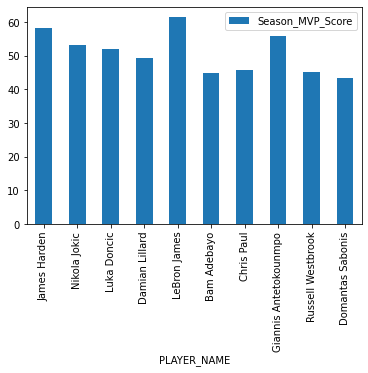

In [306]:
NBA_Analysis_CSV_Drop_Duplicates_Top10.plot.bar(x="PLAYER_NAME",y="Season_MVP_Score")
plt.show()

<AxesSubplot:xlabel='Average_Points', ylabel='Season_MVP_Score'>

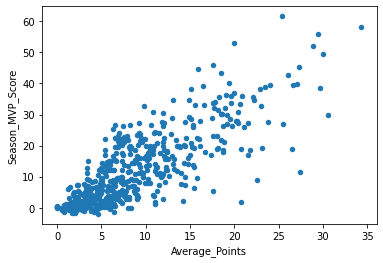

In [307]:
NBA_Analysis_CSV_Drop_Duplicates.plot.scatter(x="Average_Points",y="Season_MVP_Score")

array([[<AxesSubplot:title={'center':'Game_MVP_Score'}>]], dtype=object)

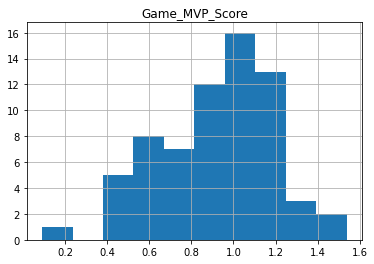

In [308]:
NBA_Analysis_CSV_Lebron=NBA_Analysis_CSV.copy()
NBA_Analysis_CSV_Lebron=NBA_Analysis_CSV_Lebron[NBA_Analysis_CSV_Lebron["PLAYER_NAME"]=="LeBron James"]
NBA_Analysis_CSV_Lebron.hist(column="Game_MVP_Score")

array([[<AxesSubplot:title={'center':'Game_MVP_Score'}>]], dtype=object)

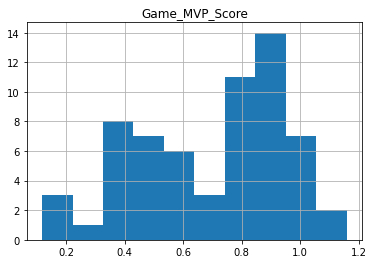

In [309]:
NBA_Analysis_CSV_Domantis=NBA_Analysis_CSV.copy()
NBA_Analysis_CSV_Domantis=NBA_Analysis_CSV_Domantis[NBA_Analysis_CSV_Domantis["PLAYER_NAME"]=="Domantas Sabonis"]
NBA_Analysis_CSV_Domantis.hist(column="Game_MVP_Score")

array([[<AxesSubplot:title={'center':'Game_MVP_Score'}>]], dtype=object)

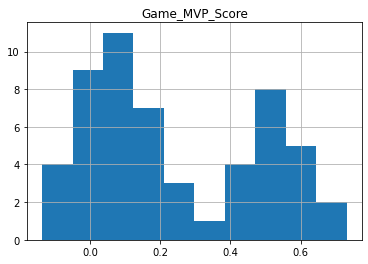

In [310]:
NBA_Analysis_CSV_Bertans=NBA_Analysis_CSV.copy()
NBA_Analysis_CSV_Bertans=NBA_Analysis_CSV_Bertans[NBA_Analysis_CSV_Bertans["PLAYER_NAME"]=="Davis Bertans"]
NBA_Analysis_CSV_Bertans.hist(column="Game_MVP_Score")

array([[<AxesSubplot:title={'center':'MIN'}>]], dtype=object)

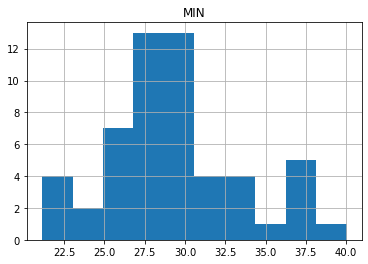

In [311]:
NBA_Analysis_CSV_Bertans=NBA_Analysis_CSV.copy()
NBA_Analysis_CSV_Bertans=NBA_Analysis_CSV_Bertans[NBA_Analysis_CSV_Bertans["PLAYER_NAME"]=="Davis Bertans"]
NBA_Analysis_CSV_Bertans.hist("MIN")

In [312]:
mvp_player_id=NBA_Analysis_CSV_Drop_Duplicates.loc[NBA_Analysis_CSV_Drop_Duplicates["Season_MVP_Ranking"]==1,"PLAYER_NAME"].values[0]
mvp_player_id

'LeBron James'

In [313]:
NBA_Analysis_CSV_Per_Min_Stats = pd.read_csv("Player Game Data.csv")

In [314]:
NBA_Analysis_CSV_Per_Min_Stats["Total Min"]=NBA_Analysis_CSV_Per_Min_Stats.groupby("PLAYER_ID")["MIN"].transform("sum")

In [315]:
NBA_Analysis_CSV_Per_Min_Stats["Total points"]=NBA_Analysis_CSV_Per_Min_Stats.groupby("PLAYER_ID")["PTS"].transform("sum")

In [316]:
NBA_Analysis_CSV_Per_Min_Stats["Total Rebounds"]=NBA_Analysis_CSV_Per_Min_Stats.groupby("PLAYER_ID")["REB"].transform("sum")

In [317]:
NBA_Analysis_CSV_Per_Min_Stats["Total Assists"]=NBA_Analysis_CSV_Per_Min_Stats.groupby("PLAYER_ID")["AST"].transform("sum")

In [318]:
NBA_Analysis_CSV_Per_Min_Stats["Total Blocks"]=NBA_Analysis_CSV_Per_Min_Stats.groupby("PLAYER_ID")["BLK"].transform("sum")

In [319]:
NBA_Analysis_CSV_Per_Min_Stats["Total Steals"]=NBA_Analysis_CSV_Per_Min_Stats.groupby("PLAYER_ID")["STL"].transform("sum")

In [320]:
NBA_Analysis_CSV_Per_Min_Stats.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,Total Min,Total points,Total Rebounds,Total Assists,Total Blocks,Total Steals
0,2019-20,2617,Udonis Haslem,1610612748,MIA,Miami Heat,21901316,2020-08-14T00:00:00,MIA @ IND,L,23.516667,3,5,0.600,1,1,1.000,0,0,0.000,1,7,8,0,1,0,0,0,3,3,7,-5,15.6,0,0,1,11184,11184,11184,11370,10497,14259,4415,6857,14524,1,12027,12814,12027,5289,1841,2524,16549,7875,10567,7039,1,14861,4183,12728,14884,13495,1909,101,44.130000,12,16,1,0,0
1,2019-20,1627763,Malcolm Brogdon,1610612754,IND,Indiana Pacers,21901316,2020-08-14T00:00:00,IND vs. MIA,W,24.516667,6,14,0.429,4,7,0.571,0,0,0.000,2,4,6,6,3,0,0,0,3,1,16,5,29.2,0,0,1,1,1,1,10604,4285,3484,11410,800,2102,2918,12027,12814,12027,2526,5976,4656,1685,1782,10567,7039,1,14861,10668,4893,6431,6011,1909,101,1666.268333,893,262,381,10,35
2,2019-20,202335,Patrick Patterson,1610612746,LAC,LA Clippers,21901317,2020-08-14T00:00:00,LAC vs. OKC,W,38.900000,4,16,0.250,4,11,0.364,5,6,0.833,3,11,14,0,2,0,0,2,3,4,17,-6,31.8,1,0,1,1,1,1,633,8029,2287,17337,800,317,7416,1616,1776,6261,1220,311,336,16549,3918,10567,7039,20277,14861,2590,4369,15626,5004,1,101,776.186667,292,151,41,3,7
3,2019-20,1628408,PJ Dozier,1610612743,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,30.800000,6,9,0.667,5,6,0.833,3,3,1.000,0,5,5,8,1,2,0,0,0,3,20,-5,43.0,0,0,1,11184,11184,11184,5768,4285,8240,2660,364,3146,1166,3804,5559,1,11304,4038,6392,746,7875,1252,7039,1,1,4183,2998,14884,1873,1909,101,411.561667,168,55,63,6,14
4,2019-20,1629126,Deonte Burton,1610612760,OKC,Oklahoma City Thunder,21901317,2020-08-14T00:00:00,OKC @ LAC,L,29.533333,3,11,0.273,0,4,0.000,0,0,0.000,1,5,6,5,4,0,0,0,2,0,6,0,16.7,0,0,1,11184,11184,11184,6782,10497,5930,17141,12218,6437,12218,12027,12814,12027,5289,4038,4656,2442,787,10567,7039,1,9590,16138,13720,10392,12837,1909,101,356.526667,104,57,17,10,7


In [321]:
NBA_Analysis_CSV_Per_Min_Stats["Total stats combined"]=NBA_Analysis_CSV_Per_Min_Stats["Total points"]+NBA_Analysis_CSV_Per_Min_Stats["Total Rebounds"]+NBA_Analysis_CSV_Per_Min_Stats["Total Assists"]+NBA_Analysis_CSV_Per_Min_Stats["Total Blocks"]+NBA_Analysis_CSV_Per_Min_Stats["Total Steals"]

In [322]:
NBA_Analysis_CSV_Per_Min_Stats.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,Total Min,Total points,Total Rebounds,Total Assists,Total Blocks,Total Steals,Total stats combined
0,2019-20,2617,Udonis Haslem,1610612748,MIA,Miami Heat,21901316,2020-08-14T00:00:00,MIA @ IND,L,23.516667,3,5,0.600,1,1,1.000,0,0,0.000,1,7,8,0,1,0,0,0,3,3,7,-5,15.6,0,0,1,11184,11184,11184,11370,10497,14259,4415,6857,14524,1,12027,12814,12027,5289,1841,2524,16549,7875,10567,7039,1,14861,4183,12728,14884,13495,1909,101,44.130000,12,16,1,0,0,29
1,2019-20,1627763,Malcolm Brogdon,1610612754,IND,Indiana Pacers,21901316,2020-08-14T00:00:00,IND vs. MIA,W,24.516667,6,14,0.429,4,7,0.571,0,0,0.000,2,4,6,6,3,0,0,0,3,1,16,5,29.2,0,0,1,1,1,1,10604,4285,3484,11410,800,2102,2918,12027,12814,12027,2526,5976,4656,1685,1782,10567,7039,1,14861,10668,4893,6431,6011,1909,101,1666.268333,893,262,381,10,35,1581
2,2019-20,202335,Patrick Patterson,1610612746,LAC,LA Clippers,21901317,2020-08-14T00:00:00,LAC vs. OKC,W,38.900000,4,16,0.250,4,11,0.364,5,6,0.833,3,11,14,0,2,0,0,2,3,4,17,-6,31.8,1,0,1,1,1,1,633,8029,2287,17337,800,317,7416,1616,1776,6261,1220,311,336,16549,3918,10567,7039,20277,14861,2590,4369,15626,5004,1,101,776.186667,292,151,41,3,7,494
3,2019-20,1628408,PJ Dozier,1610612743,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,30.800000,6,9,0.667,5,6,0.833,3,3,1.000,0,5,5,8,1,2,0,0,0,3,20,-5,43.0,0,0,1,11184,11184,11184,5768,4285,8240,2660,364,3146,1166,3804,5559,1,11304,4038,6392,746,7875,1252,7039,1,1,4183,2998,14884,1873,1909,101,411.561667,168,55,63,6,14,306
4,2019-20,1629126,Deonte Burton,1610612760,OKC,Oklahoma City Thunder,21901317,2020-08-14T00:00:00,OKC @ LAC,L,29.533333,3,11,0.273,0,4,0.000,0,0,0.000,1,5,6,5,4,0,0,0,2,0,6,0,16.7,0,0,1,11184,11184,11184,6782,10497,5930,17141,12218,6437,12218,12027,12814,12027,5289,4038,4656,2442,787,10567,7039,1,9590,16138,13720,10392,12837,1909,101,356.526667,104,57,17,10,7,195


In [323]:
NBA_Analysis_CSV_Per_Min_Stats["Per min production"]=NBA_Analysis_CSV_Per_Min_Stats["Total stats combined"]/NBA_Analysis_CSV_Per_Min_Stats["Total Min"]

In [324]:
NBA_Analysis_CSV_Per_Min_Stats.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,Total Min,Total points,Total Rebounds,Total Assists,Total Blocks,Total Steals,Total stats combined,Per min production
0,2019-20,2617,Udonis Haslem,1610612748,MIA,Miami Heat,21901316,2020-08-14T00:00:00,MIA @ IND,L,23.516667,3,5,0.600,1,1,1.000,0,0,0.000,1,7,8,0,1,0,0,0,3,3,7,-5,15.6,0,0,1,11184,11184,11184,11370,10497,14259,4415,6857,14524,1,12027,12814,12027,5289,1841,2524,16549,7875,10567,7039,1,14861,4183,12728,14884,13495,1909,101,44.130000,12,16,1,0,0,29,0.657149
1,2019-20,1627763,Malcolm Brogdon,1610612754,IND,Indiana Pacers,21901316,2020-08-14T00:00:00,IND vs. MIA,W,24.516667,6,14,0.429,4,7,0.571,0,0,0.000,2,4,6,6,3,0,0,0,3,1,16,5,29.2,0,0,1,1,1,1,10604,4285,3484,11410,800,2102,2918,12027,12814,12027,2526,5976,4656,1685,1782,10567,7039,1,14861,10668,4893,6431,6011,1909,101,1666.268333,893,262,381,10,35,1581,0.948827
2,2019-20,202335,Patrick Patterson,1610612746,LAC,LA Clippers,21901317,2020-08-14T00:00:00,LAC vs. OKC,W,38.900000,4,16,0.250,4,11,0.364,5,6,0.833,3,11,14,0,2,0,0,2,3,4,17,-6,31.8,1,0,1,1,1,1,633,8029,2287,17337,800,317,7416,1616,1776,6261,1220,311,336,16549,3918,10567,7039,20277,14861,2590,4369,15626,5004,1,101,776.186667,292,151,41,3,7,494,0.636445
3,2019-20,1628408,PJ Dozier,1610612743,DEN,Denver Nuggets,21901318,2020-08-14T00:00:00,DEN @ TOR,L,30.800000,6,9,0.667,5,6,0.833,3,3,1.000,0,5,5,8,1,2,0,0,0,3,20,-5,43.0,0,0,1,11184,11184,11184,5768,4285,8240,2660,364,3146,1166,3804,5559,1,11304,4038,6392,746,7875,1252,7039,1,1,4183,2998,14884,1873,1909,101,411.561667,168,55,63,6,14,306,0.743509
4,2019-20,1629126,Deonte Burton,1610612760,OKC,Oklahoma City Thunder,21901317,2020-08-14T00:00:00,OKC @ LAC,L,29.533333,3,11,0.273,0,4,0.000,0,0,0.000,1,5,6,5,4,0,0,0,2,0,6,0,16.7,0,0,1,11184,11184,11184,6782,10497,5930,17141,12218,6437,12218,12027,12814,12027,5289,4038,4656,2442,787,10567,7039,1,9590,16138,13720,10392,12837,1909,101,356.526667,104,57,17,10,7,195,0.546944


array([[<AxesSubplot:title={'center':'Per min production'}>]],
      dtype=object)

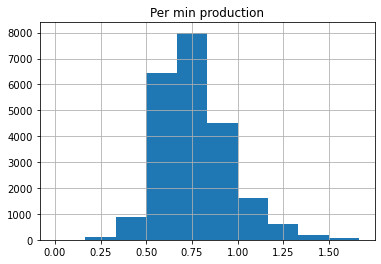

In [325]:
NBA_Analysis_CSV_Per_Min_Stats.hist(column="Per min production")

In [326]:
NBA_Analysis_CSV_Per_Min_Stats=NBA_Analysis_CSV_Per_Min_Stats.drop_duplicates(subset=["PLAYER_ID"])

In [327]:
NBA_Analysis_CSV_Per_Min_Stats["Per min rank"]=NBA_Analysis_CSV_Per_Min_Stats["Per min production"].rank(ascending=False)

In [328]:
NBA_Analysis_CSV_Per_Min_Stats=NBA_Analysis_CSV_Per_Min_Stats.sort_values(by="Per min rank")

In [329]:
NBA_Analysis_CSV_Per_Min_Stats.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,Total Min,Total points,Total Rebounds,Total Assists,Total Blocks,Total Steals,Total stats combined,Per min production,Per min rank
432,2019-20,203507,Giannis Antetokounmpo,1610612749,MIL,Milwaukee Bucks,21901303,2020-08-11T00:00:00,MIL @ WAS,W,10.150000,1,3,0.333,0,0,0.000,10,12,0.833,2,7,9,1,3,1,0,0,2,8,12,12,24.3,0,0,1,1,1,1,19474,16399,17424,14612,12218,17645,12218,195,222,6261,2526,1841,1902,11429,1782,3910,7039,1,9590,314,7720,2830,8415,1909,101,1916.880000,1857,856,354,66,61,3194,1.666249,1.0
1393,2019-20,203092,Tyler Zeller,1610612759,SAS,San Antonio Spurs,21901254,2020-08-03T00:00:00,SAS @ PHI,L,3.700000,1,4,0.250,0,0,0.000,0,0,0.000,3,1,4,0,0,0,0,0,0,0,2,3,6.8,0,0,1,11184,11184,11184,21329,16399,15877,17337,12218,17645,12218,12027,12814,12027,1220,15663,8556,16549,14568,10567,7039,1,1,16138,18314,7893,18699,1909,101,3.875000,2,4,0,0,0,6,1.548387,2.0
138,2019-20,1629029,Luka Doncic,1610612742,DAL,Dallas Mavericks,21901313,2020-08-13T00:00:00,DAL @ PHX,L,13.233333,5,9,0.556,1,2,0.500,7,7,1.000,1,4,5,0,1,1,0,0,2,5,18,-2,26.0,0,0,1,11184,11184,11184,18165,5844,8240,5983,6857,11477,3230,742,1305,1,5289,5976,6392,16549,7875,3910,7039,1,9590,1560,3879,12258,7484,1909,101,2047.245000,1759,573,538,14,62,2946,1.439007,3.0
14,2019-20,201935,James Harden,1610612745,HOU,Houston Rockets,21901315,2020-08-14T00:00:00,HOU vs. PHI,L,26.283333,9,16,0.563,4,9,0.444,5,5,1.000,0,3,3,10,7,1,2,0,1,6,27,-11,47.6,1,0,1,11184,11184,11184,9229,1367,2287,5889,800,860,5961,1616,2711,1,11304,8691,11273,286,54,3910,720,1,4186,894,1028,18852,1169,1,101,2482.550000,2335,446,512,60,125,3478,1.400979,4.0
125,2019-20,1629719,Devontae Cacok,1610612747,LAL,Los Angeles Lakers,21901310,2020-08-13T00:00:00,LAL vs. SAC,L,8.866667,3,6,0.500,0,0,0.000,0,0,0.000,2,3,5,1,0,0,0,0,0,0,6,5,13.5,0,0,1,11184,11184,11184,19810,10497,12598,7108,12218,17645,12218,12027,12814,12027,2526,8691,6392,11429,14568,10567,7039,1,1,16138,13720,6431,14827,1909,101,8.866667,6,5,1,0,0,12,1.353383,5.0


In [330]:
NBA_Analysis_CSV_Per_Min_Stats=NBA_Analysis_CSV_Per_Min_Stats[NBA_Analysis_CSV_Per_Min_Stats["Per min rank"]<=20]

<AxesSubplot:xlabel='PLAYER_NAME'>

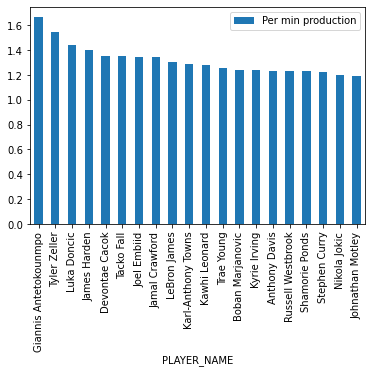

In [333]:
NBA_Analysis_CSV_Per_Min_Stats.plot.bar(x="PLAYER_NAME",y="Per min production")